# Lecture 16: Linear regression II Demo

The **diabetes** data set can be obtained at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

## 1. Set up notebook and load data set

In [15]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote `x`) and one response variable (which we'll denote `y`).

In [16]:
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

## 2. Predict `y` without using `x`

If we want to predict `y` without knowledge of `x`, what value would be predict? The average value of `y`.

In this case, the mean squared error (MSE) associated with the prediction is simply the variance of `y`.

In [17]:
print("Prediction: ", np.mean(y))
print("Mean squared error: ", np.var(y))
print("square root of the Mean squared error: ", np.sqrt(np.var(y)))


('Prediction: ', 152.13348416289594)
('Mean squared error: ', 5929.8848969103828)
('square root of the Mean squared error: ', 77.005745869450436)


## 3. Predict `y` using a single feature of `x`

To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in `sklearn.linear_model.LinearRegression()`.

Here we define a function, **one_feature_regression**, that takes `x` and `y`, along with the index `f` of a single feature and fits a linear regressor to `(x[f],y)`. It then plots the data along with the resulting line.

In [18]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print("Feature index is out of bounds")
        return 0
    regr = linear_model.LinearRegression()
    x1 = x[:,[f]]
    regr.fit(x1, y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print("Mean squared error: ", mean_squared_error(y, y_pred))
    print("square root of Mean squared error: ", np.sqrt(mean_squared_error(y, y_pred)))
    return regr

Let's try this with feature #2 (body mass index).

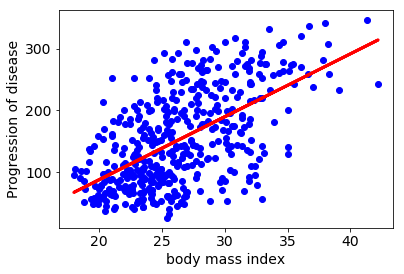

('Mean squared error: ', 3890.4565854612729)
('square root of Mean squared error: ', 62.373524715709891)
('w = ', array([ 10.23312787]))
('b = ', -117.77336656656527)


In [19]:
regr = one_feature_regression(x,y,2)
print("w = ", regr.coef_)
print("b = ", regr.intercept_)

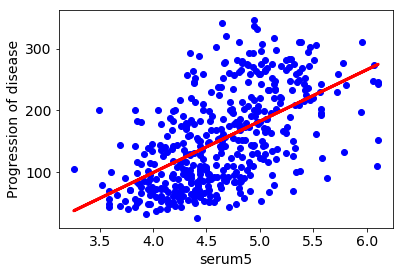

('Mean squared error: ', 4030.9987225912855)
('square root of Mean squared error: ', 63.490146657503367)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
### You can use this space to figure out the second-best feature -->8
one_feature_regression(x,y,8)

## 3. Predict `y` using a specified subset of features from `x`

In [22]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print("Feature index is out of bounds")
            return
    regr = linear_model.LinearRegression()
    regr.fit(x[:,flist], y)
    return regr

Try using just features #2 (body mass index) and #8 (serum5).

In [23]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print("w = ", regr.coef_)
print("b = ", regr.intercept_)
print("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

('w = ', array([  7.27600054,  56.05638703]))
('b = ', -299.95751508023613)
('Mean squared error: ', 3205.1900768248529)


Finally, use all 10 features.

In [24]:
regr = feature_subset_regression(x,y,range(0,10))
print("w = ", regr.coef_)
print("b = ", regr.intercept_)
print("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

('w = ', array([ -3.63612242e-02,  -2.28596481e+01,   5.60296209e+00,
         1.11680799e+00,  -1.08999633e+00,   7.46450456e-01,
         3.72004715e-01,   6.53383194e+00,   6.84831250e+01,
         2.80116989e-01]))
('b = ', -334.56713851878749)
('Mean squared error: ', 2859.6963475867501)
